# User guide
## 목적
- 코드 활용법을 설명합니다.
- config 설정법을 설명합니다.

----

## 0. Environment setup
- python version: `Python 3.9.12`
#
- 주요 pip 패키지 설치가 필요합니다.
  - `cd est_wassup_02`
  - `pip install -r requirements.txt`

----

## 1. Data preparation
## 1-1. Config setup
- `est_wassup_02/preprocess.py` 를 이용하여 수행하는 경우,
  - 아래의 파일 내용을 수정하여 설정할 수 있습니다.
  - `est_wassup_02/configs/preprocess_config.py`
  - config 사용법은 Readme 파일을 참고하시기 바랍니다.
- python function 을 불러와 수행하는 경우,
  - 아래의 코드를 참고하시기 바랍니다.
- train script 에는 data preparation logic 이 포함되어있지 않습니다.
  - 만약 model config 가 변경되는 경우, 새로운 data preparation 과정이 필요할 수 있습니다.

In [15]:
from core.utils import fill_num_strategy
from sklearn.preprocessing import MinMaxScaler

ROOT_PATH = "." # absolute path to est_wassup_02
FILL_NUM_STRATEGY = fill_num_strategy("custom_mean") # nan 값을 채워주는 함수
SELECTED_X_SCALER = MinMaxScaler() #  X feature 에 사용될 데이터 스케일러. 사용을 원치 않을경우, None 이라고 입력해주세요.
SELECTED_Y_SCALER = None # Y feature 에 사용될 데이터 스케일러. 사용을 원치 않을경우, None 이라고 입력해주세요.
DROP_COLS_AFTER_MERGE = [ # 학습 시 포함시키지 않을 컬럼을 선택해주세요. 자세한 내용은 Readme 를 참고하세요.
  "county", "is_business", "is_consumption", "product_type",
  # "data_block_id",
  "row_id", "date", "date_client",
  "forecast_date_electricity", "origin_date_electricity", "forecast_date_gas", "origin_date_gas",
  "prediction_unit_id", "year", "quarter", "month", "week",  "day", "hour",
  "day_of_year", "day_of_month", "day_of_week",
  # "eic_count_client",
  "installed_capacity_client",
  # "temperature_h_mean",
  # "dewpoint_h_mean",
  "rain_h_mean",
  # "snowfall_h_mean",
  "surface_pressure_h_mean",
  # "cloudcover_total_h_mean",
  "cloudcover_low_h_mean", "cloudcover_mid_h_mean", "cloudcover_high_h_mean",
  "windspeed_10m_h_mean", "winddirection_10m_h_mean",
  # "shortwave_radiation_h_mean",
  # "direct_solar_radiation_h_mean",
  "diffuse_radiation_h_mean", "hour_h", "hours_ahead_f_mean",
  "temperature_f_mean", "dewpoint_f_mean",
  "cloudcover_high_f_mean", "cloudcover_low_f_mean", "cloudcover_mid_f_mean",
  "cloudcover_total_f_mean", "10_metre_u_wind_component_f_mean",
  "10_metre_v_wind_component_f_mean",
  "direct_solar_radiation_f_mean",
  # "surface_solar_radiation_downwards_f_mean",
  "snowfall_f_mean",
  "total_precipitation_f_mean", "euros_per_mwh_electricity",
  "lowest_price_per_mwh_gas", "highest_price_per_mwh_gas",
  "mean_price_per_mwh_gas",
  "country_holiday"
]

config = {
  ## input_data, add_data 경로의 경우, Readme 에 설명되어 있습니다. Readme 를 참고하시기 바랍니다.
  # origin data path
  "input_data": {
    "train_csv": f"{ROOT_PATH}/data/train.csv",
    "test_csv": f"{ROOT_PATH}/data/test.csv"
  },
  # save preprocess results
  "output_data": {
    "train_csv": f"{ROOT_PATH}/features/train_X.csv",
    "test_csv": f"{ROOT_PATH}/features/test_X.csv",
    "y_scaler_save": f"{ROOT_PATH}/features/y_scaler.save",
  },
  "add_data": {
    "train": {
      "client": f"{ROOT_PATH}/data/train/client.csv",
      "historical_weather": f"{ROOT_PATH}/data/train/historical_weather.csv",
      "forecast_weather": f"{ROOT_PATH}/data/train/forecast_weather.csv",
      "electricity_prices": f"{ROOT_PATH}/data/train/electricity_prices.csv",
      "gas_prices": f"{ROOT_PATH}/data/train/gas_prices.csv",
    },
    "test": {
      "client": f"{ROOT_PATH}/data/test/client.csv",
      "historical_weather": f"{ROOT_PATH}/data/test/historical_weather.csv",
      "forecast_weather": f"{ROOT_PATH}/data/test/forecast_weather.csv",
      "electricity_prices": f"{ROOT_PATH}/data/test/electricity_prices.csv",
      "gas_prices": f"{ROOT_PATH}/data/test/gas_prices.csv",
    },
    "county_mapper": {"county_mapper": f"{ROOT_PATH}/data/county_lon_lats.csv"}
  },
  "options": {
    # origin dataset
    "index_col": "datetime",
    "tst_index_col": "prediction_datetime",
    "target_col": "target",
    "use_arima": False, # 이 값이 True 로 설정되는 경우, index 와 target 컬럼만 저장됩니다.
    "row_query": {
      "prediction_unit_id": 0, # which prediction_unit_id to use
      "is_consumption": 0 # whether the dataset is for consumption data or production data
    },
    "use_drop_cols": True, # whether to use drop_cols or use_cols. DO NOT ADJUST THE VALUE.
    "drop_cols": [], # columns to drop. DO NOT ADJUST THE VALUE.
    "use_cols": ["currently_scored"], # unused column. DO NOT ADJUST THE VALUE.,
    # custom dataset
    "drop_cols_after_merge": DROP_COLS_AFTER_MERGE,
    "fill_num_strategy": FILL_NUM_STRATEGY,
    "x_scaler": SELECTED_X_SCALER,
    "y_scaler": SELECTED_Y_SCALER,
  },
}

## 1-2. Preprocess
- `preprocess.py` 파일을 활용하여 실행하는 경우, 
  - command 창에 `python preprocess.py` 를 통하여 실행할 수 있습니다.
  - 실행의 결과물은 `est_wassup_02/features` 에서 확인 가능합니다.
- jupyter notebook 을 통해 진행하는 경우,
  - 아래의 코드 참고 바랍니다.
  - 결과물은 config 에서 설정된 경로에 저장됩니다.

In [16]:
from core.preprocess import CustomDataset
from core.utils import create_path_if_not_exists, delete_file_if_exists
import joblib

input_data = config.get('input_data')
add_data = config.get('add_data')
options = config.get('options')
output_data = config.get('output_data')

# preprocess 실행 코드
trn_X, tst_X, y_scaler = CustomDataset(
  **input_data,
  **options,
  add_data=add_data
).preprocess()

# 저장경로 생성
for k,v in output_data.items():
  create_path_if_not_exists(v, True, '/', create_new_path=False)

# 결과물 저장
trn_X.to_csv(output_data.get('train_csv'))
tst_X.to_csv(output_data.get('test_csv'))

y_scaler_save = output_data.get('y_scaler_save')
delete_file_if_exists(y_scaler_save)
if options.get('y_scaler') != None:
  joblib.dump(y_scaler, y_scaler_save) 

(15264, 9)
(96, 9)


----
# 2. Train

## 2-1. Arima / Sarima
### 2-1-1. Config setup
- python script 파일을 통해 실행하는 경우,
  - Readme 를 참고하여 `configs/arima_config.py` 를 수정하여 설정해주세요.
- jupyter notebook 에서 실행하는 경우,
  - 아래의 코드를 참고해주세요.

In [6]:
ROOT_PATH = '.' # est_wassup_02 의 절대경로

EXPERIMENT_NAME = "실험명" # 만약 같은 실험명으로 로컬에 이미 output 이 존재하는 경우, 실험명_1 로 저장됩니다.

TEST_SIZE = 24 # 실험하고자 하는 test_size

ARIMA_MODEL = "ARIMA" # ARIMA or SARIMA
ORDER = (25, 1, 0) # p, d, q
SEASON_ORDER = (0, 0, 0, 24) # P, D, Q, S
TREND = "c"
FREQ = "h"

config = {
  "input_data": {
    "train_csv": f"{ROOT_PATH}/features/train_X.csv",
    "test_csv": f"{ROOT_PATH}/features/test_X.csv",
    "y_scaler_save": f"{ROOT_PATH}/features/y_scaler.save",
  },
  "output_data": {
    "root_dir": f"{ROOT_PATH}/output/{EXPERIMENT_NAME}",
    "plot_img_path": "output.png",
    "json_path": "output.json",
    "pred_save_path": "pred_save.csv",
    "actual_save_path": "actual_save.csv",
  },
  "test_size": TEST_SIZE, 
  "arima_model": ARIMA_MODEL,
  "arima_params":{
    "order": ORDER,
    "seasonal_order": SEASON_ORDER,
    "trend": TREND,
    "freq": FREQ
  }
}

### 2-1-2. Train Arima
- python script 파일을 이용하는 경우,
  - command 창에 `python train_arima.py` 를 입력하여 실행해주세요.
  - 실험 결과물은 `est_wassup_02/output` 에 저장됩니다.
- jupyter notebook 을 활용하는 경우,
  - 아래의 코드를 참고하여 사용해주세요.

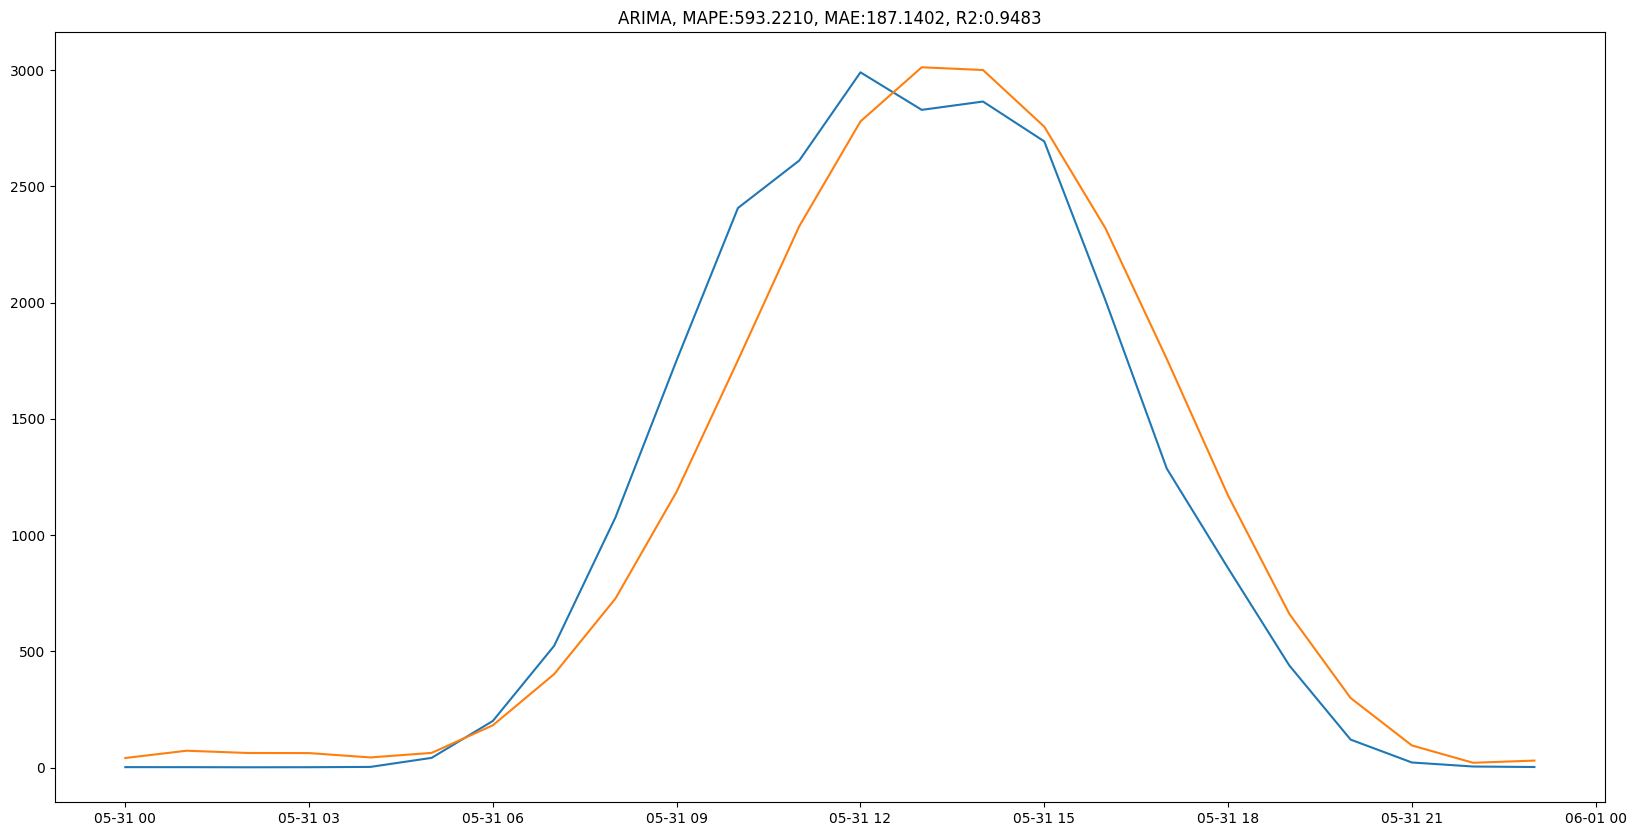

In [7]:
from core.metrics import mae, mape, r2_score
from core.trains import arima
from core.utils import create_path_if_not_exists, combine_paths, save_params_json
import joblib
import matplotlib.pyplot as plt
import pandas as pd


# preprocess 한 데이터 가져오기
input_data = config.get("input_data")
df_train = pd.read_csv(input_data.get("train_csv"), index_col=0)

# test size 로 데이터 자르기
test_size = config.get("test_size")
trn_ds = df_train.iloc[:-test_size]
tst_ds = df_train.iloc[-test_size:].copy()
# index datatype 을 datetime 으로 수정
trn_ds.index = pd.to_datetime(trn_ds.index)
tst_ds.index = pd.to_datetime(tst_ds.index)

# arima params
arima_params = config.get("arima_params")

# ARIMA or SARIMA 모델 가져오기
arima_model = config.get("arima_model")

# arima 트레인
pred = arima(trn_ds, test_size, tst_ds.index[0], tst_ds.index[-1], arima_model, arima_params)
pred = pd.DataFrame({"prediction": pred.values}, index=tst_ds.index)

# preprocess 에서 y 값을 scaling 한 경우, 되돌리기
y_scaler = None
try:
    y_scaler = joblib.load(input_data.get("y_scaler_save"))
except:
    pass

if y_scaler != None:
    tst_ds["target"] = y_scaler.inverse_transform(tst_ds)
    pred["prediction"] = y_scaler.inverse_transform(pred)

# Save plot - 결과 플롯 저장
output_data = config.get("output_data")

pred_save_path = output_data.get("pred_save_path")
actual_save_path = output_data.get("actual_save_path")
root_dir = create_path_if_not_exists(output_data.get("root_dir"), remove_filename=False)

pred.to_csv(combine_paths(root_dir, pred_save_path))
tst_ds.to_csv(combine_paths(root_dir, actual_save_path))

plot_img_path = combine_paths(root_dir, output_data.get("plot_img_path"))

plt.figure(figsize=(20, 10))
plt.plot(tst_ds.index, tst_ds.values, pred.index, pred.values)
plt.title(
    f"{arima_model}, MAPE:{mape(pred['prediction'].values,tst_ds['target'].values):.4f}, MAE:{mae(pred['prediction'].values,tst_ds['target'].values):.4f}, R2:{r2_score(pred['prediction'].values,tst_ds['target'].values):.4f}"
)
plt.savefig(plot_img_path)  # save as png

# Save parameters
json_path = combine_paths(root_dir, output_data.get("json_path"))
save_params_json(json_path, object_to_save=config, pickle=False)

## 2-2. ANN
### 2-2-1. Config setup
- python script 파일을 통해 실행하는 경우,
  - Readme 를 참고하여 `configs/train_config.py` 를 수정하여 설정해주세요.
- jupyter notebook 에서 실행하는 경우,
  - 아래의 코드를 참고해주세요.
  - 각 설정의 자세한 내용은 Readme 를 참고하시기 바랍니다.

In [10]:
from models import ANN
import torch
from torch import optim
import torch.nn.functional as F
from torch.nn import ReLU

ROOT_PATH = '.' # est_wassup_02 의 절대경로

EEXPERIMENT_NAME = "실험명" # 만약 같은 실험명으로 로컬에 이미 output 이 존재하는 경우, 실험명_1 로 저장됩니다.

TEST_SIZE = 24 # 실험하고자 하는 test_size

# train params
EPOCHS = 30
LEARNING_RATE = 0.00001 
BATCH_SIZE = 32
LOSS_FUNC = F.mse_loss
OPTIM = torch.optim.Adam
METRIC = F.l1_loss

# nn params
MODEL = ANN
PRED_SIZE = 24
WINDOW_SIZE = 12
ACTIVATION_FUNC = ReLU()
HIDDEN_DIM = [128, 64]
USE_DROP = True
DROP_RATIO = 0.3
OUTPUT_FUNC = lambda x: x # lambda x: x when output function is unwanted or F.sigmoid

# scheduler
USE_SCHEDULER = False
SCHEDULER = optim.lr_scheduler.CosineAnnealingLR
SCHEDULER_PARAMS = {
    "T_max": 50,
    "eta_min": 0.000001,
}

# early stop
USE_EARLY_STOP = True
EARLY_STOP_PARAMS = {
    "patience_limit": 20 # 몇 번의 epoch까지 지켜볼지를 결정
}

config = {
    "input_data": {
        "train_csv": f"{ROOT_PATH}/features/train_X.csv",
        # "test_csv": f"{ROOT_PATH}/features/test_X.csv",
        "y_scaler_save": f"{ROOT_PATH}/features/y_scaler.save",
    },
    "output_data": {
        "root_dir": f"{ROOT_PATH}/output/{EXPERIMENT_NAME}",
        "output_train": "model.pth",
        "plot_img_path": "output.png",
        "json_path": "config.json",
        "output_pred": "pred.csv",
        "output_best_train": "best_model.pth"
    },
    "test_size": TEST_SIZE,
    "model": MODEL,
    "model_params": {
        "input_dim": WINDOW_SIZE,  # window size
        "input_channel": "auto",  # number of features
        "hidden_dim": HIDDEN_DIM,
        "use_drop": USE_DROP,
        "drop_ratio": DROP_RATIO,
        "activation": ACTIVATION_FUNC,
        "output_dim": PRED_SIZE,
        "output_func": OUTPUT_FUNC
    },
    "train_params": {
        "use_scheduler": USE_SCHEDULER,
        "scheduler_cls": SCHEDULER,
        "scheduler_params": SCHEDULER_PARAMS,
        "use_early_stop": USE_EARLY_STOP,
        "early_stop_params": EARLY_STOP_PARAMS,
        "loss": LOSS_FUNC,
        "optim": OPTIM,
        "metric": METRIC,
        "epochs": EPOCHS,
        "dataset_params": {
            "window_size": WINDOW_SIZE,
            "prediction_size": PRED_SIZE,
        },
        "data_loader_params": {
            "batch_size": BATCH_SIZE,
            "shuffle": True,
        },
        "optim_params": {
            "lr": LEARNING_RATE,
        },
    },
}

### 2-2-2. Train ANN
- python script 파일을 이용하는 경우,
  - command 창에 `python train.py` 를 입력하여 실행해주세요.
  - 실험 결과물은 `est_wassup_02/output` 에 저장됩니다.
- jupyter notebook 을 활용하는 경우,
  - 아래의 코드를 참고하여 사용해주세요.

trn.shape: (15216, 1)
val.shape: (36, 1)
tst.shape: (36, 1)


  0%|          | 0/30 [00:00<?, ?it/s]

y-shape: (24,)
p-shape: (24,)
b-shape: (24,)


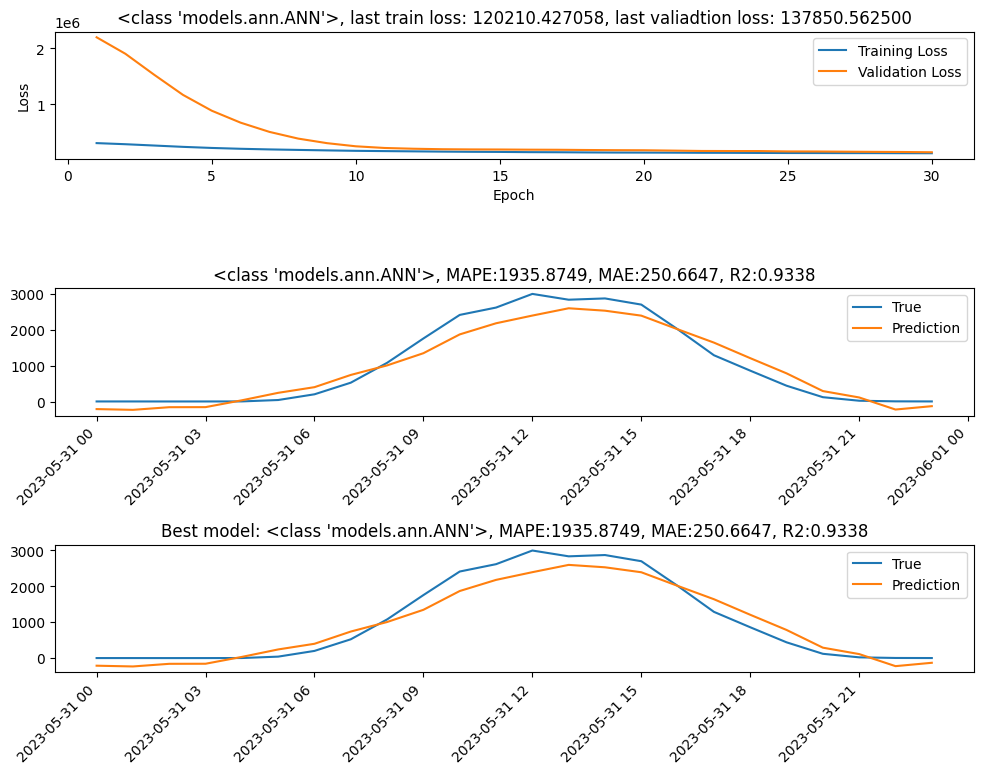

In [11]:
from core.dataloader import TimeseriesDataset
from core.metrics import mae, mape, r2_score
from core.trains import nn_train, nn_predict
from core.utils import (
    create_path_if_not_exists,
    save_params_json,
    combine_paths,
    SaveBestModel
)
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader
import joblib


## load datasets
# get preprocessed csv files
input_data = config.get("input_data")
train_data = pd.read_csv(input_data.get('train_csv'), index_col=0)
train_data.index = pd.to_datetime(train_data.index) # change index data type

model_params = config.get("model_params")
window_size = model_params.get("input_dim") # 24
prediction_size = model_params.get("output_dim")
test_size = config.get("test_size") # 96


## split dataset
# trn & val data
trn_ds = train_data[:-test_size*2].to_numpy(dtype=np.float32)
val_ds = train_data[-window_size-test_size*2:-test_size].to_numpy(dtype=np.float32) # 96 step + 24 step = 120 steps

# test data
tst_ds_y = train_data[-test_size:]['target'].copy()
tst_df = train_data[-window_size-test_size:].copy()
tst_df['target'][-test_size:] = np.nan
tst_ds = tst_df.to_numpy(dtype=np.float32) # 96 step + 24 step = 120 steps

print("trn.shape:", trn_ds.shape)
print("val.shape:", val_ds.shape)
print("tst.shape:", tst_ds.shape)


## generate dataloader
train_params = config.get("train_params")
ds_params = train_params.get("dataset_params")
dl_params = train_params.get("data_loader_params")

# train
trn_ds = TimeseriesDataset(trn_ds, **ds_params)
trn_dl = DataLoader(trn_ds, **dl_params)

# validation
val_ds = TimeseriesDataset(val_ds, **ds_params)
val_dl = DataLoader(val_ds, shuffle=False, batch_size=len(val_ds))

# test
tst_ds = TimeseriesDataset(tst_ds, **ds_params)
tst_dl = DataLoader(tst_ds, shuffle=False, batch_size=1)


## generate model
# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create model
Model = config.get("model")
model_params = config.get("model_params")
n_featues = train_data.shape[1]
model = Model(**{**model_params, "input_channel": n_featues}).to(device)

# optimizer
Optim = train_params.get("optim")
optim_params = train_params.get("optim_params")
optimizer = Optim(model.parameters(), **optim_params)

# learning rate scheduler
LRScheduler = train_params.get("scheduler_cls") 
scheduler_params = train_params.get("scheduler_params")
use_scheduler = train_params.get("use_scheduler")
scheduler = None
if use_scheduler:
    scheduler = LRScheduler(optimizer, **scheduler_params)

# early stop
use_early_stop = train_params.get("use_early_stop")
early_stop_params = train_params.get("early_stop_params")

loss = train_params.get("loss")
metric = train_params.get("metric")
epochs = train_params.get("epochs")


## best model saver initializer
output_data = config.get("output_data")
root_dir = create_path_if_not_exists(output_data.get("root_dir"), remove_filename=False)
best_model_save_path = combine_paths(root_dir, output_data.get("output_best_train"))
best_model_saver = SaveBestModel(best_model_save_path)


## TRAIN
trn_loss_lst, val_loss_lst = nn_train(epochs, trn_dl, val_dl, model, loss, metric, optimizer, device, scheduler, use_early_stop, early_stop_params, best_model_saver)


## save pre-trained weight
final_model_save_path = combine_paths(root_dir, output_data.get('output_train'))
torch.save(model.state_dict(), final_model_save_path)
save_params_json(combine_paths(root_dir, output_data.get("json_path")), config)


## load models
# final model
model = Model(**{**model_params, "input_channel": n_featues}).to(device)
model.load_state_dict(torch.load(final_model_save_path))
model.eval()
# best model
best_model = Model(**{**model_params, "input_channel": n_featues}).to(device)
best_model.load_state_dict(torch.load(best_model_save_path))
best_model.eval()


## Prediction
# retrieve from test dataloader
pred = nn_predict(tst_dl, model, test_size, prediction_size, window_size, device)
pred_best_model = nn_predict(tst_dl, best_model, test_size, prediction_size, window_size, device)

# inverse scaling
y_scaler = None
try:
    y_scaler = joblib.load(input_data.get("y_scaler_save"))
except:
    pass

if y_scaler != None:
    y = y_scaler.inverse_transform(pd.DataFrame(tst_ds_y))
    p = y_scaler.inverse_transform([pred])
    p_best_model = y_scaler.inverse_transform([pred_best_model])
else:
    y = pd.DataFrame(tst_ds_y).to_numpy()
    p = np.array([pred])
    p_best_model = np.array([pred_best_model])

y = np.concatenate([y[:,0], y[-1,1:]]) # true 
p = np.concatenate([p[:,0], p[-1,1:]]) # prediction
p_best_model = np.concatenate([p_best_model[:,0], p_best_model[-1,1:]]) # prediction
print("y-shape:", y.shape)
print("p-shape:", p.shape)
print("b-shape:", p_best_model.shape)

pred_df = pd.DataFrame({'prediction': p})
pred_df.to_csv(combine_paths(root_dir, output_data.get("output_pred")))


### Visualization with Results ###
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

# Plotting the losses
ax1.plot(range(1,len(trn_loss_lst)+1), trn_loss_lst, label='Training Loss')
ax1.plot(range(1,len(val_loss_lst)+1), val_loss_lst, label='Validation Loss')
ax1.set_title(f"{Model}, last train loss: {trn_loss_lst[-1]:.6f}, last valiadtion loss: {val_loss_lst[-1]:.6f}")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Visualize results - true, pred with metrics  
ax2.plot(tst_ds_y.index, y, label="True")
ax2.plot(tst_ds_y.index, p, label="Prediction")
ax2.set_title(f"{Model}, MAPE:{mape(p,y):.4f}, MAE:{mae(p,y):.4f}, R2:{r2_score(p,y):.4f}")
ax2.legend()
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right")
date_format = mdates.DateFormatter('%Y-%m-%d %H')
ax2.xaxis.set_major_formatter(date_format)
plt.xticks(tst_ds_y.index[::3])

# Visualize results - true, pred with metrics  
ax3.plot(tst_ds_y.index, y, label="True")
ax3.plot(tst_ds_y.index, p_best_model, label="Prediction")
ax3.set_title(f"Best model: {Model}, MAPE:{mape(p_best_model,y):.4f}, MAE:{mae(p_best_model,y):.4f}, R2:{r2_score(p_best_model,y):.4f}")
ax3.legend()
plt.setp(ax3.get_xticklabels(), rotation=45, ha="right")
date_format = mdates.DateFormatter('%Y-%m-%d %H')
ax3.xaxis.set_major_formatter(date_format)
plt.xticks(tst_ds_y.index[::3])

plt.tight_layout()
plt.savefig(combine_paths(root_dir, output_data.get("plot_img_path"))) # save as png


## 2-3. Patch TST
### 2-3-1. Config setup
- python script 파일을 통해 실행하는 경우,
  - Readme 를 참고하여 `configs/patchtst_config.py` 를 수정하여 설정해주세요.
- jupyter notebook 에서 실행하는 경우,
  - 아래의 코드를 참고해주세요.
  - 각 설정의 자세한 내용은 Readme 를 참고하시기 바랍니다.

In [17]:
from models import PatchTST
import torch
from torch import optim
import torch.nn.functional as F


ROOT_PATH = '.' # est_wassup_02 의 절대경로

EEXPERIMENT_NAME = "실험명" # 만약 같은 실험명으로 로컬에 이미 output 이 존재하는 경우, 실험명_1 로 저장됩니다.

TEST_SIZE = 24 # 실험하고자 하는 test_size

TARGET_COL = "target"

# train params
EPOCHS = 10
LEARNING_RATE = 0.00001
BATCH_SIZE = 32
LOSS_FUNC = F.mse_loss
OPTIM = torch.optim.Adam
METRIC = F.l1_loss

# model params
MODEL = PatchTST
PRED_SIZE = 24
PATCH_LENGTH = 16
N_PATCHES = 64
MODEL_DIM = 128
NUM_HEADS = 8
NUM_LAYERS = 3
DIM_FEED_FORWARD = 256
OUTPUT_FUNC = lambda x: x # lambda x: x when output function is unwanted or F.sigmoid

USE_SCHEDULER = True
SCHEDULER = optim.lr_scheduler.CosineAnnealingLR
SCHEDULER_PARAMS = {
    "T_max": 40,
    "eta_min": 0.000001,
}

# early stop
USE_EARLY_STOP = True
EARLY_STOP_PARAMS = {
    "patience_limit": 3
}

config = {
    "input_data": {
        "train_csv": f"{ROOT_PATH}/features/train_X.csv",
        # "test_csv": f"{ROOT_PATH}/features/test_X.csv",
        "y_scaler_save": f"{ROOT_PATH}/features/y_scaler.save",
    },
    "output_data": {
        "root_dir": f"{ROOT_PATH}/output/{EXPERIMENT_NAME}",
        "output_train": "model.pth",
        "plot_img_path": "output.png",
        "json_path": "config.json",
        "output_pred": "pred.csv",
        "output_best_train": "best_model.pth"
    },
    "test_size": TEST_SIZE,
    "window_size": int(PATCH_LENGTH*N_PATCHES/2),
    "model": MODEL,
    "model_params": {
        "n_token": N_PATCHES,
        "input_dim": PATCH_LENGTH,  
        "model_dim": MODEL_DIM,  
        "num_heads": NUM_HEADS, 
        "num_layers": NUM_LAYERS,
        "dim_feedforward": DIM_FEED_FORWARD,
        "output_dim": PRED_SIZE,
        "output_func": OUTPUT_FUNC
    },
    "train_params": {
        "use_scheduler": USE_SCHEDULER,
        "scheduler_cls": SCHEDULER,
        "scheduler_params": SCHEDULER_PARAMS,
        "use_early_stop": USE_EARLY_STOP,
        "early_stop_params": EARLY_STOP_PARAMS,
        "loss": LOSS_FUNC,
        "optim": OPTIM,
        "metric": METRIC,
        "epochs": EPOCHS,
        "dataset_params": {
            "patch_length": PATCH_LENGTH,
            "n_patches": N_PATCHES,
            "prediction_length": PRED_SIZE
        },
        "data_loader_params": {
            "batch_size": BATCH_SIZE,
            "shuffle": True,
        },
        "optim_params": {
            "lr": LEARNING_RATE,
        },
    },
}


### 2-3-2. Train Patch TST
- python script 파일을 이용하는 경우,
  - command 창에 `python train_patchtst.py` 를 입력하여 실행해주세요.
  - 실험 결과물은 `est_wassup_02/output` 에 저장됩니다.
- jupyter notebook 을 활용하는 경우,
  - 아래의 코드를 참고하여 사용해주세요.

trn.shape: (15216, 9)
val.shape: (536, 9)
tst.shape: (536, 9)
trn_dl x.shape: torch.Size([32, 64, 16])
trn_dl y.shape: torch.Size([32, 24])


  0%|          | 0/10 [00:00<?, ?it/s]

y-shape: (24,)
p-shape: (24,)
b-shape: (24,)


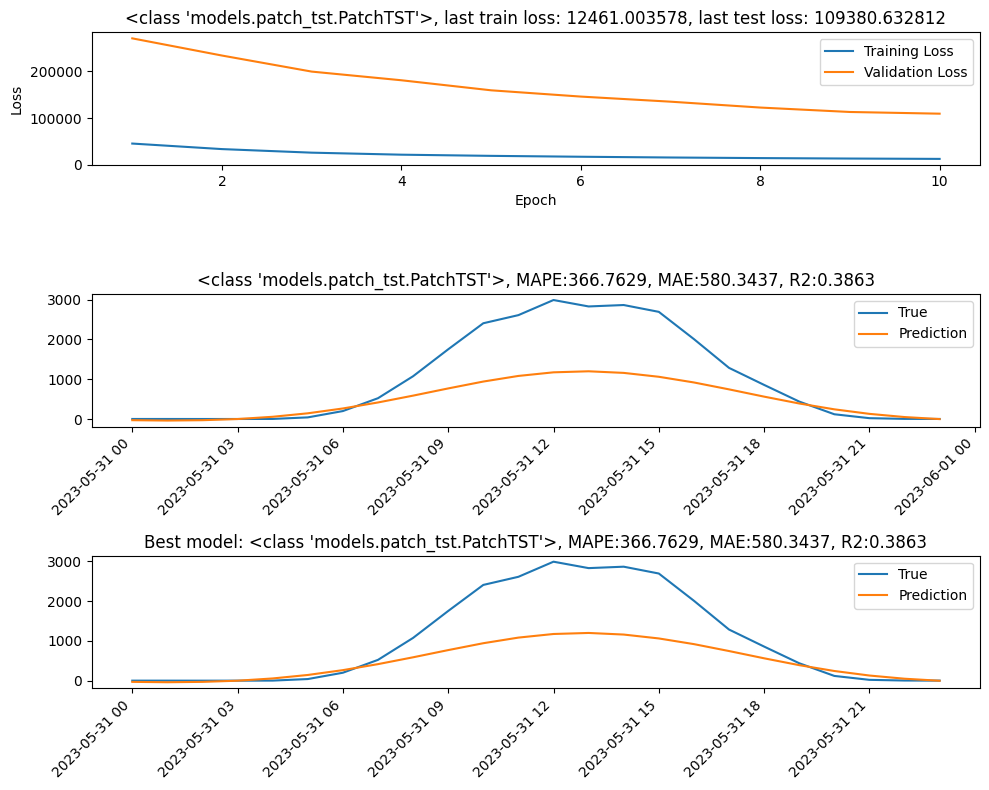

In [18]:
from core.dataloader import PatchTSTDataset
from core.metrics import mae, mape, r2_score
from core.trains import tst_train, tst_predict
from core.utils import (
    create_path_if_not_exists,
    save_params_json,
    combine_paths,
    SaveBestModel
)
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader
import joblib


## load datasets
# get preprocessed csv files
input_data = config.get("input_data")
train_data = pd.read_csv(input_data.get('train_csv'), index_col=0)
train_data.index = pd.to_datetime(train_data.index) 

model_params = config.get("model_params")
window_size = config.get("window_size")
prediction_size = model_params.get("output_dim")
test_size = config.get("test_size")


## split dataset
# trn & val data
trn_ds = train_data[:-test_size*2].to_numpy(dtype=np.float32)
val_ds = train_data[-window_size-test_size*2:-test_size].to_numpy(dtype=np.float32)

# test data
tst_ds_y = train_data[-test_size:]['target'].copy()
tst_df = train_data[-window_size-test_size:].copy()
tst_df['target'][-test_size:] = np.nan
tst_ds = tst_df.to_numpy(dtype=np.float32)

print("trn.shape:", trn_ds.shape)
print("val.shape:", val_ds.shape)
print("tst.shape:", tst_ds.shape)


## generate dataLoader
train_params = config.get("train_params")
ds_params = train_params.get("dataset_params")
dl_params = train_params.get("data_loader_params")

# Loop: create [trn_ds, val_ds, tst_ds] for each feature
n_features = trn_ds.shape[1]
if n_features > 1:
    trn_datasets = []
    val_datasets = []
    tst_datasets = []
    for i in range(n_features):
        trn_datasets.append(PatchTSTDataset(trn_ds[:, i].flatten(), **ds_params))
        val_datasets.append(PatchTSTDataset(val_ds[:, i].flatten(), **ds_params))
        tst_datasets.append(PatchTSTDataset(tst_ds[:, i].flatten(), **ds_params))
    trn_ds = torch.utils.data.ConcatDataset(trn_datasets)
    val_ds = torch.utils.data.ConcatDataset(val_datasets)
    tst_ds = torch.utils.data.ConcatDataset(tst_datasets)
else:
    trn_ds = PatchTSTDataset(trn_ds.flatten(), **ds_params)
    val_ds = PatchTSTDataset(val_ds.flatten(), **ds_params)
    tst_ds = PatchTSTDataset(tst_ds.flatten(), **ds_params)

# dataloader
trn_dl = DataLoader(trn_ds, **dl_params)
val_dl = DataLoader(val_ds, shuffle=False, batch_size=len(val_ds))
tst_dl = DataLoader(tst_ds, shuffle=False, batch_size=1)

x, y = next(iter(trn_dl))
print("trn_dl x.shape:", x.shape)
print("trn_dl y.shape:", y.shape)


## genearte model
# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create model
Model = config.get("model")
model_params = config.get("model_params")
model = Model(**{**model_params}).to(device)

# optimizer
Optim = train_params.get("optim")
optim_params = train_params.get("optim_params")
optimizer = Optim(model.parameters(), **optim_params)

# learning rate scheduler
LRScheduler = train_params.get("scheduler_cls") 
scheduler_params = train_params.get("scheduler_params")
use_scheduler = train_params.get("use_scheduler")
scheduler = None
if use_scheduler:
    scheduler = LRScheduler(optimizer, **scheduler_params)

# early stop
use_early_stop = train_params.get("use_early_stop")
early_stop_params = train_params.get("early_stop_params")

loss = train_params.get("loss")
metric = train_params.get("metric")
epochs = train_params.get("epochs")


## best model saver initializer
output_data = config.get("output_data")
root_dir = create_path_if_not_exists(output_data.get("root_dir"), remove_filename=False)
best_model_save_path = combine_paths(root_dir, output_data.get("output_best_train"))
best_model_saver = SaveBestModel(best_model_save_path)


## TRAIN
trn_loss_lst, val_loss_lst = tst_train(epochs, trn_dl, val_dl, model, loss, metric, optimizer, device, scheduler, use_early_stop, early_stop_params, best_model_saver)


## save pre-trained weight
final_model_save_path = combine_paths(root_dir, output_data.get('output_train'))
torch.save(model.state_dict(), final_model_save_path)
save_params_json(combine_paths(root_dir, output_data.get("json_path")), config)


## load models
# final model
model = Model(**{**model_params}).to(device)
model.load_state_dict(torch.load(final_model_save_path))
model.eval()
# best model
best_model = Model(**{**model_params}).to(device)
best_model.load_state_dict(torch.load(best_model_save_path))
best_model.eval()


## Prediction
# retrieve from test dataloader
pred = tst_predict(tst_dl, model, test_size, prediction_size, window_size, device)
pred_best_model = tst_predict(tst_dl, best_model, test_size, prediction_size, window_size, device)

# inverse scaling
y_scaler = None
try:
    y_scaler = joblib.load(input_data.get("y_scaler_save"))
except:
    pass

if y_scaler != None:
    y = y_scaler.inverse_transform(pd.DataFrame(tst_ds_y))
    p = y_scaler.inverse_transform([pred])
    p_best_model = y_scaler.inverse_transform([pred_best_model])
else:
    y = pd.DataFrame(tst_ds_y).to_numpy()
    p = np.array([pred])
    p_best_model = np.array([pred_best_model])

y = np.concatenate([y[:,0], y[-1,1:]]) # true 
p = np.concatenate([p[:,0], p[-1,1:]]) # prediction
p_best_model = np.concatenate([p_best_model[:,0], p_best_model[-1,1:]]) # prediction
print("y-shape:", y.shape)
print("p-shape:", p.shape)
print("b-shape:", p_best_model.shape)

pred_df = pd.DataFrame({'prediction': p})
pred_df.to_csv(combine_paths(root_dir, output_data.get("output_pred")))


### Visualization with Results ###
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

# Plotting the losses
ax1.plot(range(1,len(trn_loss_lst)+1), trn_loss_lst, label='Training Loss')
ax1.plot(range(1,len(val_loss_lst)+1), val_loss_lst, label='Validation Loss')
ax1.set_title(f"{Model}, last train loss: {trn_loss_lst[-1]:.6f}, last test loss: {val_loss_lst[-1]:.6f}")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Visualize results - true, pred with metrics  
ax2.plot(tst_ds_y.index, y, label="True")
ax2.plot(tst_ds_y.index, p, label="Prediction")
ax2.set_title(f"{Model}, MAPE:{mape(p,y):.4f}, MAE:{mae(p,y):.4f}, R2:{r2_score(p,y):.4f}")
ax2.legend()
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right")
date_format = mdates.DateFormatter('%Y-%m-%d %H')
ax2.xaxis.set_major_formatter(date_format)
plt.xticks(tst_ds_y.index[::3])

# Visualize results - true, pred with metrics  
ax3.plot(tst_ds_y.index, y, label="True")
ax3.plot(tst_ds_y.index, p_best_model, label="Prediction")
ax3.set_title(f"Best model: {Model}, MAPE:{mape(p_best_model,y):.4f}, MAE:{mae(p_best_model,y):.4f}, R2:{r2_score(p_best_model,y):.4f}")
ax3.legend()
plt.setp(ax3.get_xticklabels(), rotation=45, ha="right")
date_format = mdates.DateFormatter('%Y-%m-%d %H')
ax3.xaxis.set_major_formatter(date_format)
plt.xticks(tst_ds_y.index[::3])

plt.tight_layout()
plt.savefig(combine_paths(root_dir, output_data.get("plot_img_path"))) # save as png


# 3. Auto Train
- 여러개의 config 파일을 별도의 command 없이 순차적으로 실행하는 기능입니다.
- 아래의 폴더들에 config 파일을 원하는 만큼 만들어주세요. - `.py` 파일로 만들어주세요.
  - Arima train: `est_wassup_02/auto-configs-arima`
  - ANN train: `est_wassup_02/auto-configs-nn`
  - Patch TST train: `est_wassup_02/auto-configs-tst`
- auto_train.py 의 내용을 수정해주세요.
  - TYPE 부분을 수정하여 주세요.
  - 'arima': Arima 모델을 돌리고자 하는 경우
  - 'nn': ANN 모델을 돌리고자 하는 경우
  - 'tst': Patch TST 를 돌리고자 하는 경우
- command 창에 `python auto_train.py` 를 입력하여 실행시켜주세요.